In [3]:
import pandas as pd

# Use raw string to avoid backslash errors
df = pd.read_csv(r'C:\Users\tharu\OneDrive\Desktop\Python_DA_Project\healthcare_dataset.csv')

# Confirm load
print("Shape:", df.shape)
df.head()


Shape: (55500, 15)


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [5]:
# Overview of data types and nulls
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [7]:
# Count missing values per column
df.isnull().sum()


Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [9]:
df.describe()


,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [15]:
import pandas as pd

# Step 3: Data Cleaning

# Remove invalid rows with negative billing amounts
df_cleaned = df[df["Billing Amount"] >= 0].copy()

# Standardize text columns
text_cols = ["Name", "Gender", "Blood Type", "Medical Condition", "Insurance Provider",
             "Admission Type", "Medication", "Test Results"]

for col in text_cols:
    df_cleaned[col] = df_cleaned[col].str.lower().str.strip()

# Drop high-cardinality or personally identifiable columns
df_cleaned.drop(columns=["Name", "Doctor", "Hospital"], inplace=True)

# Convert dates to datetime format
df_cleaned["Date of Admission"] = pd.to_datetime(df_cleaned["Date of Admission"])
df_cleaned["Discharge Date"] = pd.to_datetime(df_cleaned["Discharge Date"])

# Add new columns
df_cleaned["Length of Stay"] = (df_cleaned["Discharge Date"] - df_cleaned["Date of Admission"]).dt.days
df_cleaned["Admission Year"] = df_cleaned["Date of Admission"].dt.year
df_cleaned["Admission Month"] = df_cleaned["Date of Admission"].dt.month

# Final check
print("Cleaning done. Shape:", df_cleaned.shape)
df_cleaned.head()


Cleaning done. Shape: (55392, 15)


,Age,Gender,Blood Type,Medical Condition,Date of Admission,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Length of Stay,Admission Year,Admission Month
0,30,male,b-,cancer,2024-01-31,blue cross,18856.281306,328,urgent,2024-02-02,paracetamol,normal,2,2024,1
1,62,male,a+,obesity,2019-08-20,medicare,33643.327287,265,emergency,2019-08-26,ibuprofen,inconclusive,6,2019,8
2,76,female,a-,obesity,2022-09-22,aetna,27955.096079,205,emergency,2022-10-07,aspirin,normal,15,2022,9
3,28,female,o+,diabetes,2020-11-18,medicare,37909.782410,450,elective,2020-12-18,ibuprofen,abnormal,30,2020,11
4,43,female,ab+,cancer,2022-09-19,aetna,14238.317814,458,urgent,2022-10-09,penicillin,abnormal,20,2022,9


In [17]:
# Feature 1: Senior flag
df_cleaned["is_senior"] = df_cleaned["Age"] >= 60

# Feature 2: Billing per day (avoid division by zero)
df_cleaned["billing_per_day"] = df_cleaned["Billing Amount"] / df_cleaned["Length of Stay"].replace(0, 1)

# Feature 3: Weekend admission flag
df_cleaned["is_weekend_admit"] = df_cleaned["Date of Admission"].dt.weekday >= 5  # 5 = Saturday, 6 = Sunday

# Feature 4: Long stay flag (15+ days)
df_cleaned["long_stay_flag"] = df_cleaned["Length of Stay"] >= 15

# Feature 5: Age group
def categorize_age(age):
    if age < 20:
        return 'teen'
    elif age < 40:
        return 'young_adult'
    elif age < 60:
        return 'adult'
    else:
        return 'senior'
df_cleaned["age_group"] = df_cleaned["Age"].apply(categorize_age)

# Feature 6: Admission season
def get_season(month):
    if month in [12, 1, 2]:
        return "winter"
    elif month in [3, 4, 5]:
        return "spring"
    elif month in [6, 7, 8]:
        return "summer"
    else:
        return "fall"
df_cleaned["admission_season"] = df_cleaned["Admission Month"].apply(get_season)

# Feature 7: Billing bucket
def billing_bucket(amount):
    if amount < 15000:
        return "low"
    elif amount < 30000:
        return "medium"
    else:
        return "high"
df_cleaned["billing_bucket"] = df_cleaned["Billing Amount"].apply(billing_bucket)

# Feature 8: Chronic condition flag
chronic_conditions = ['diabetes', 'hypertension', 'asthma']
df_cleaned["is_chronic_condition"] = df_cleaned["Medical Condition"].isin(chronic_conditions)

# Show new features added
df_cleaned[[
    "Age", "is_senior", "billing_per_day", "is_weekend_admit", "long_stay_flag",
    "age_group", "admission_season", "billing_bucket", "Medical Condition", "is_chronic_condition"
]].head()


,Age,is_senior,billing_per_day,is_weekend_admit,long_stay_flag,age_group,admission_season,billing_bucket,Medical Condition,is_chronic_condition
0,30,False,9428.140653,False,False,young_adult,winter,medium,cancer,False
1,62,True,5607.221214,False,False,senior,summer,high,obesity,False
2,76,True,1863.673072,False,True,senior,fall,medium,obesity,False
3,28,False,1263.659414,False,True,young_adult,fall,high,diabetes,True
4,43,False,711.915891,False,True,adult,fall,low,cancer,False


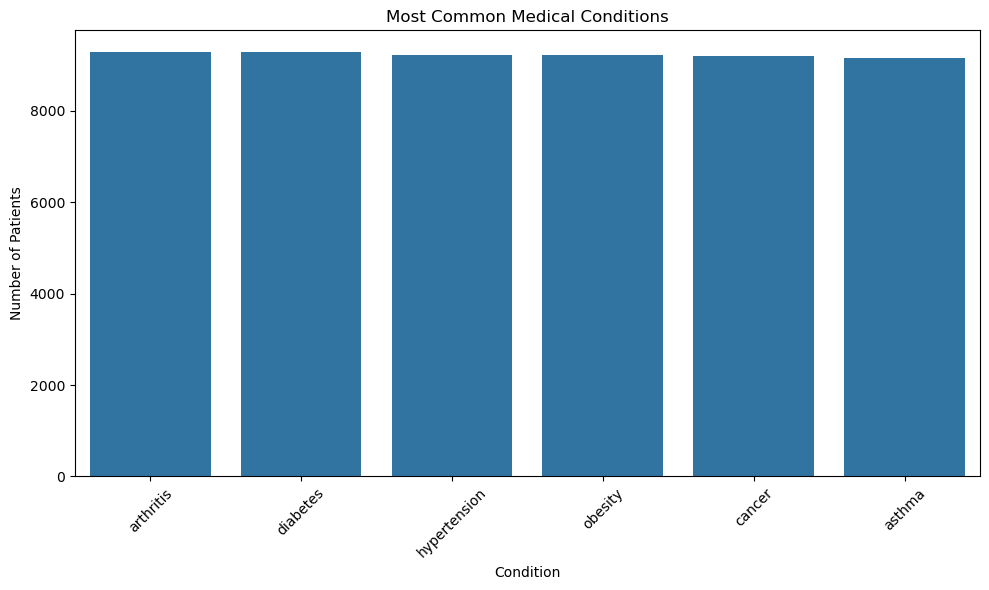

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Bar Chart – Most common medical conditions
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x="Medical Condition", order=df_cleaned["Medical Condition"].value_counts().index)
plt.title("Most Common Medical Conditions")
plt.xlabel("Condition")
plt.ylabel("Number of Patients")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


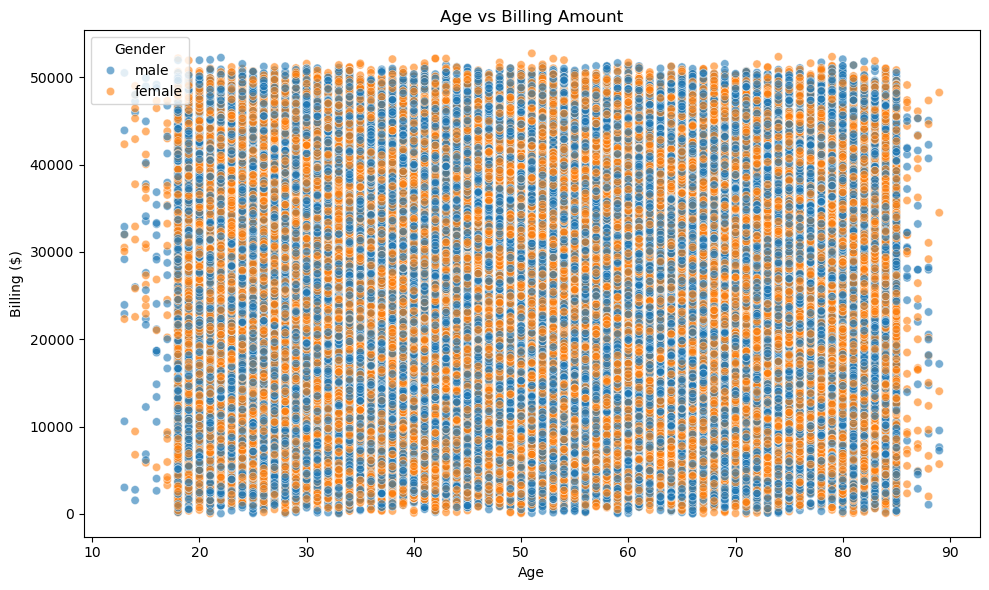

In [31]:
# 2. Scatter Plot – Age vs Billing Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x="Age", y="Billing Amount", hue="Gender", alpha=0.6)
plt.title("Age vs Billing Amount")
plt.xlabel("Age")
plt.ylabel("Billing ($)")
plt.tight_layout()
plt.show()

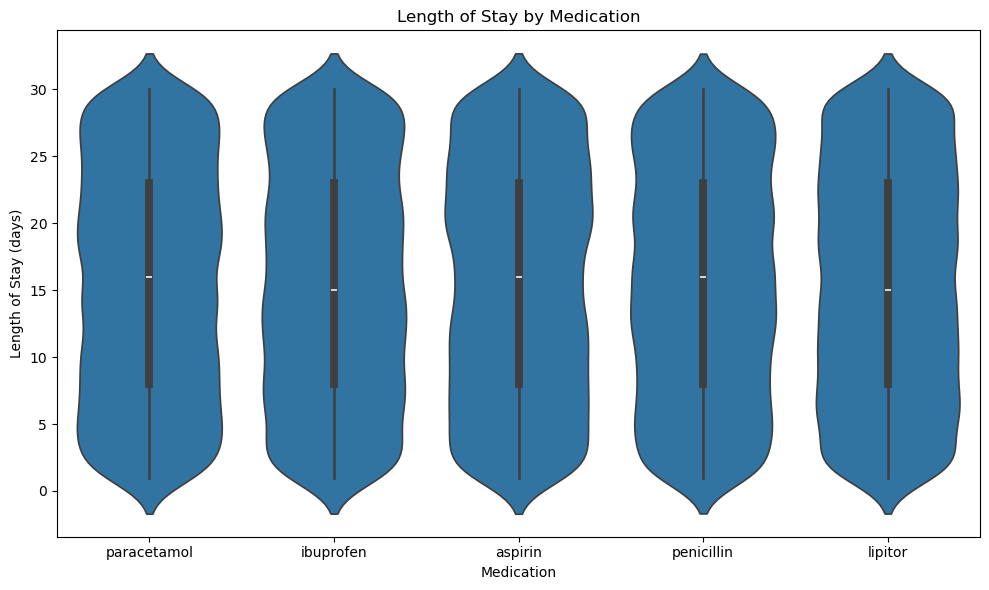

In [33]:
# 3. Violin Plot – Medication vs Length of Stay
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_cleaned, x="Medication", y="Length of Stay", inner="box")
plt.title("Length of Stay by Medication")
plt.xlabel("Medication")
plt.ylabel("Length of Stay (days)")
plt.tight_layout()
plt.show()

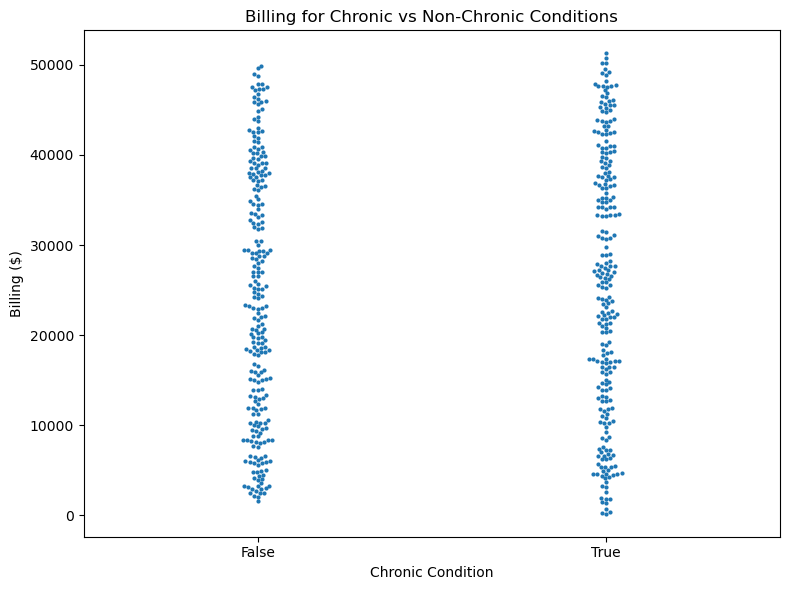

In [35]:
# 4. Swarm Plot – Chronic Condition vs Billing
plt.figure(figsize=(8, 6))
sns.swarmplot(data=df_cleaned.sample(500), x="is_chronic_condition", y="Billing Amount", size=3)
plt.title("Billing for Chronic vs Non-Chronic Conditions")
plt.xlabel("Chronic Condition")
plt.ylabel("Billing ($)")
plt.tight_layout()
plt.show()

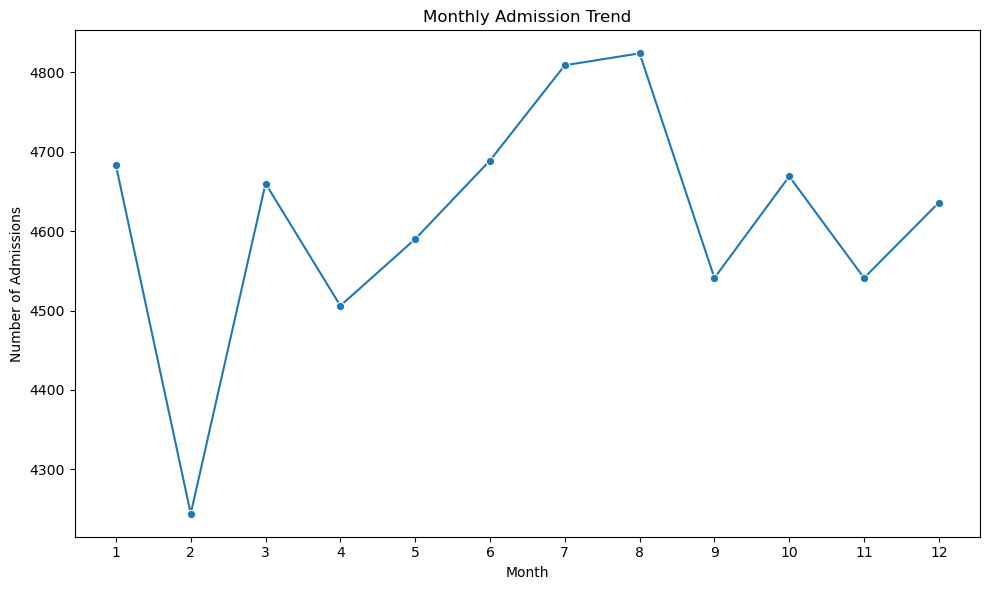

In [37]:
# 5. Line Chart – Monthly Admissions Trend
monthly_admits = df_cleaned["Admission Month"].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_admits.index, y=monthly_admits.values, marker="o")
plt.title("Monthly Admission Trend")
plt.xlabel("Month")
plt.ylabel("Number of Admissions")
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

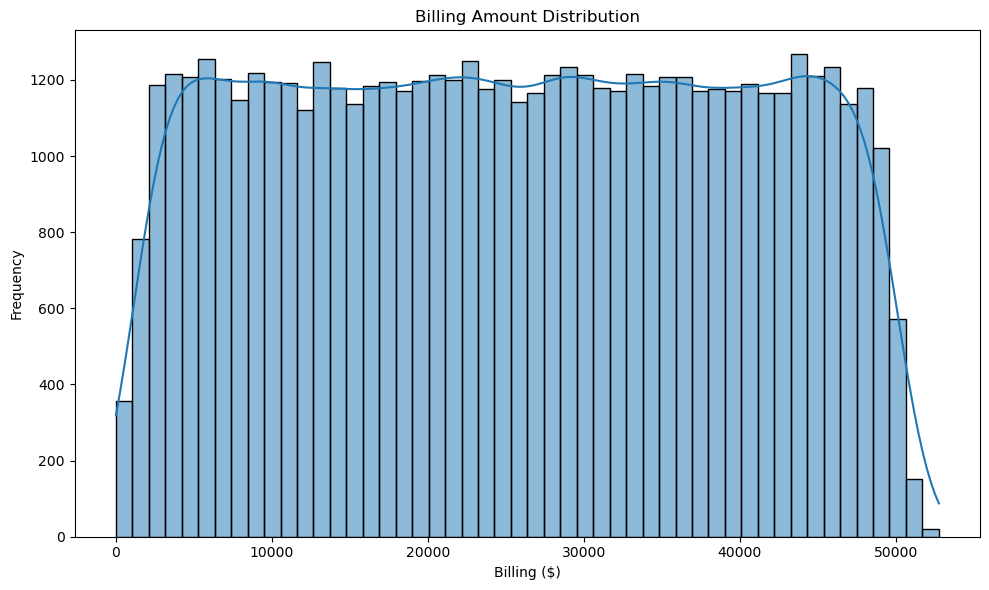

In [39]:
# 6. Histogram – Billing Amount Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned["Billing Amount"], bins=50, kde=True)
plt.title("Billing Amount Distribution")
plt.xlabel("Billing ($)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

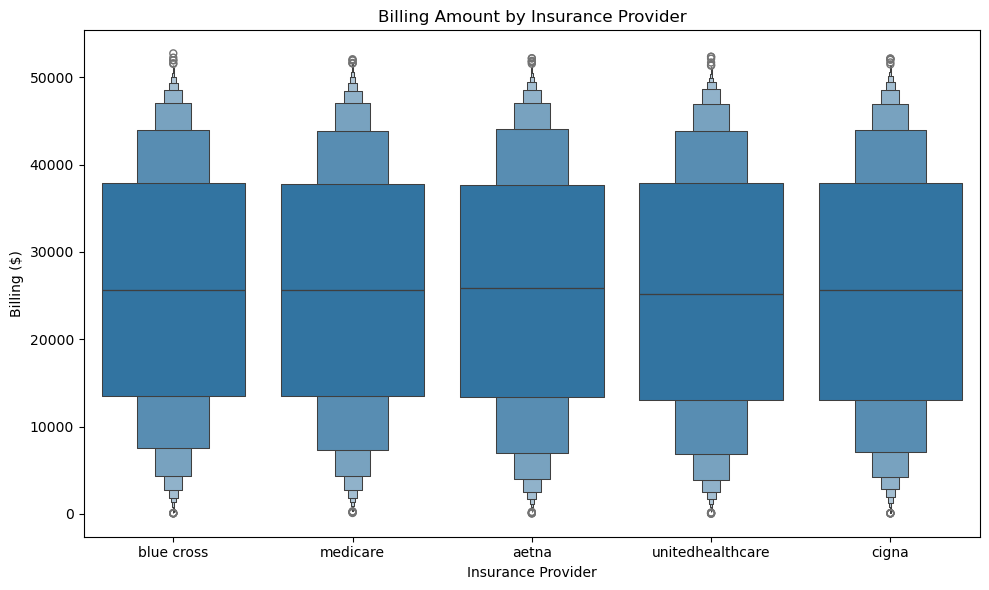

In [41]:
# 7. Boxen Plot – Insurance Provider vs Billing
plt.figure(figsize=(10, 6))
sns.boxenplot(data=df_cleaned, x="Insurance Provider", y="Billing Amount")
plt.title("Billing Amount by Insurance Provider")
plt.xlabel("Insurance Provider")
plt.ylabel("Billing ($)")
plt.tight_layout()
plt.show()

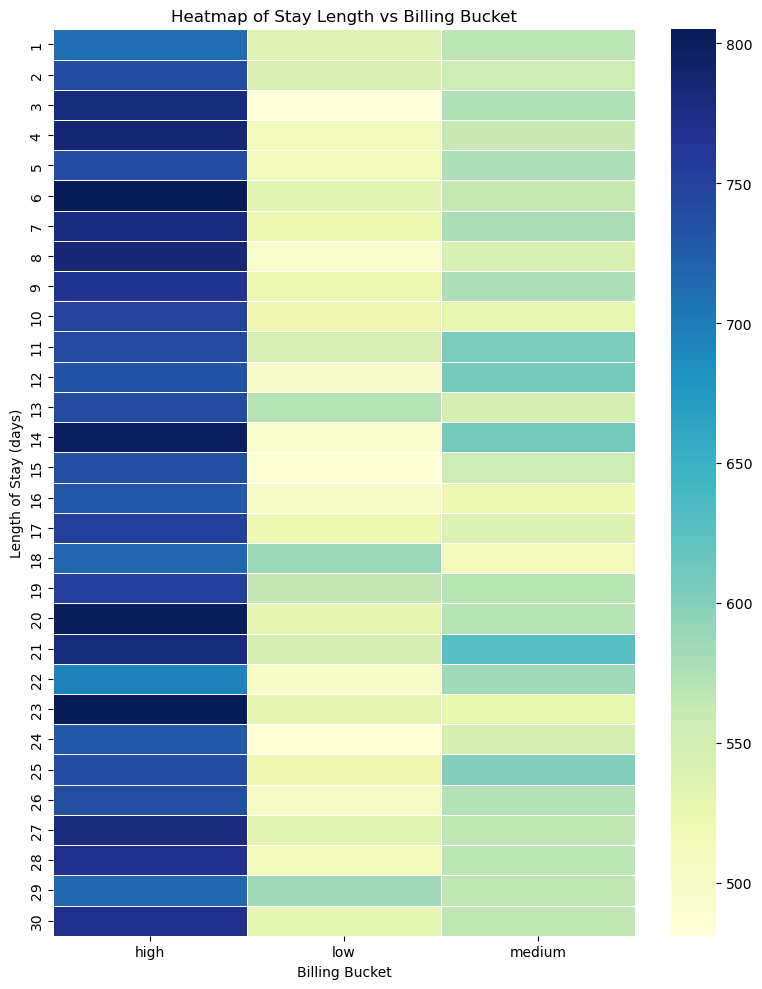

In [43]:
# 8. Heatmap – Length of Stay vs Billing Bucket
heat_data = pd.crosstab(df_cleaned["Length of Stay"], df_cleaned["billing_bucket"])
plt.figure(figsize=(8, 10))
sns.heatmap(heat_data, cmap="YlGnBu", linewidths=0.5)
plt.title("Heatmap of Stay Length vs Billing Bucket")
plt.xlabel("Billing Bucket")
plt.ylabel("Length of Stay (days)")
plt.tight_layout()
plt.show()

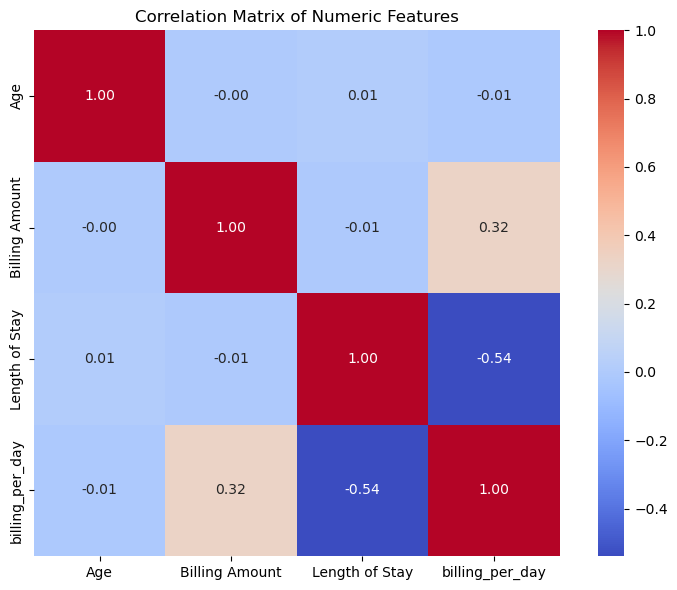

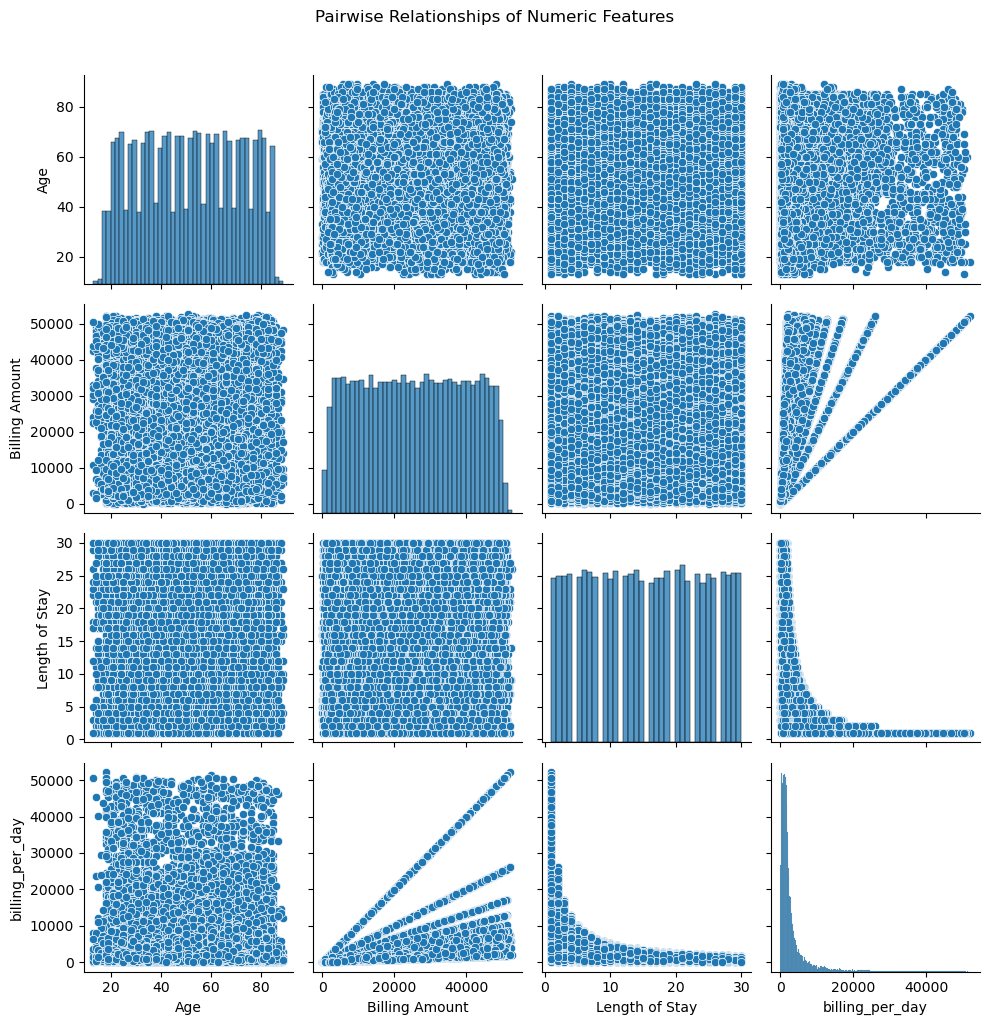

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_cleaned is your cleaned DataFrame
# If not already computed:
df_cleaned["Length of Stay"] = (
    pd.to_datetime(df_cleaned["Discharge Date"]) - pd.to_datetime(df_cleaned["Date of Admission"])
).dt.days
df_cleaned["billing_per_day"] = df_cleaned["Billing Amount"] / df_cleaned["Length of Stay"].replace(0, 1)

# Select only numeric features
numeric_features = ["Age", "Billing Amount", "Length of Stay", "billing_per_day"]

# Compute correlation matrix
correlation_matrix = df_cleaned[numeric_features].corr()

# Display correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix of Numeric Features")
plt.tight_layout()
plt.show()

# Display pairplot
sns.pairplot(df_cleaned[numeric_features])
plt.suptitle("Pairwise Relationships of Numeric Features", y=1.02)
plt.tight_layout()
plt.show()
